In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

Now, read the data using pandas dataframe:


In [3]:
df = pd.read_csv("/content/drive/MyDrive/intership/drug200 (1).csv")


In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
df.shape

(200, 6)

In [8]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
x = df[["Age","Sex","BP","Cholesterol", "Na_to_K"]].values
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [10]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [11]:
from sklearn import preprocessing

sex = preprocessing.LabelEncoder()
sex.fit(['F','M'])
x[:,1] = sex.transform(x[:,1]) 


BP = preprocessing.LabelEncoder()
BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = BP.transform(x[:,2])


chol = preprocessing.LabelEncoder()
chol.fit([ 'NORMAL', 'HIGH'])
x[:,3] = chol.transform(x[:,3])

In [13]:
x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [14]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.2, random_state=3)

In [15]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (160, 5) &  Size of Y training set (160,)


In [16]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [17]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [18]:
clf.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
pred = clf.predict(X_testset)

In [22]:
pred

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX'], dtype=object)

In [23]:
print(pred[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [24]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, pred))

DecisionTrees's Accuracy:  1.0


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print("classificationreport")
print(classification_report(y_testset,pred,digits=2))
print("confusion marix")
print(confusion_matrix(y_testset,pred))
from sklearn.metrics import jaccard_score
print("jaccob index")
print(jaccard_score(y_testset,pred, average='weighted'))

classificationreport
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        16
       drugY       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

confusion marix
[[ 4  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 12]]
jaccob index
1.0


[Text(0.625, 0.9, 'X[4] <= 14.829\nentropy = 1.921\nsamples = 160\nvalue = [19, 12, 12, 38, 79]'),
 Text(0.5, 0.7, 'X[2] <= 0.5\nentropy = 1.819\nsamples = 81\nvalue = [19, 12, 12, 38, 0]'),
 Text(0.25, 0.5, 'X[0] <= 50.5\nentropy = 0.963\nsamples = 31\nvalue = [19, 12, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12, 0, 0, 0]'),
 Text(0.75, 0.5, 'X[3] <= 0.5\nentropy = 0.795\nsamples = 50\nvalue = [0, 0, 12, 38, 0]'),
 Text(0.625, 0.3, 'X[2] <= 1.5\nentropy = 0.999\nsamples = 23\nvalue = [0, 0, 12, 11, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 0, 27, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 79\nvalue = [0, 0, 0, 0, 79]')]

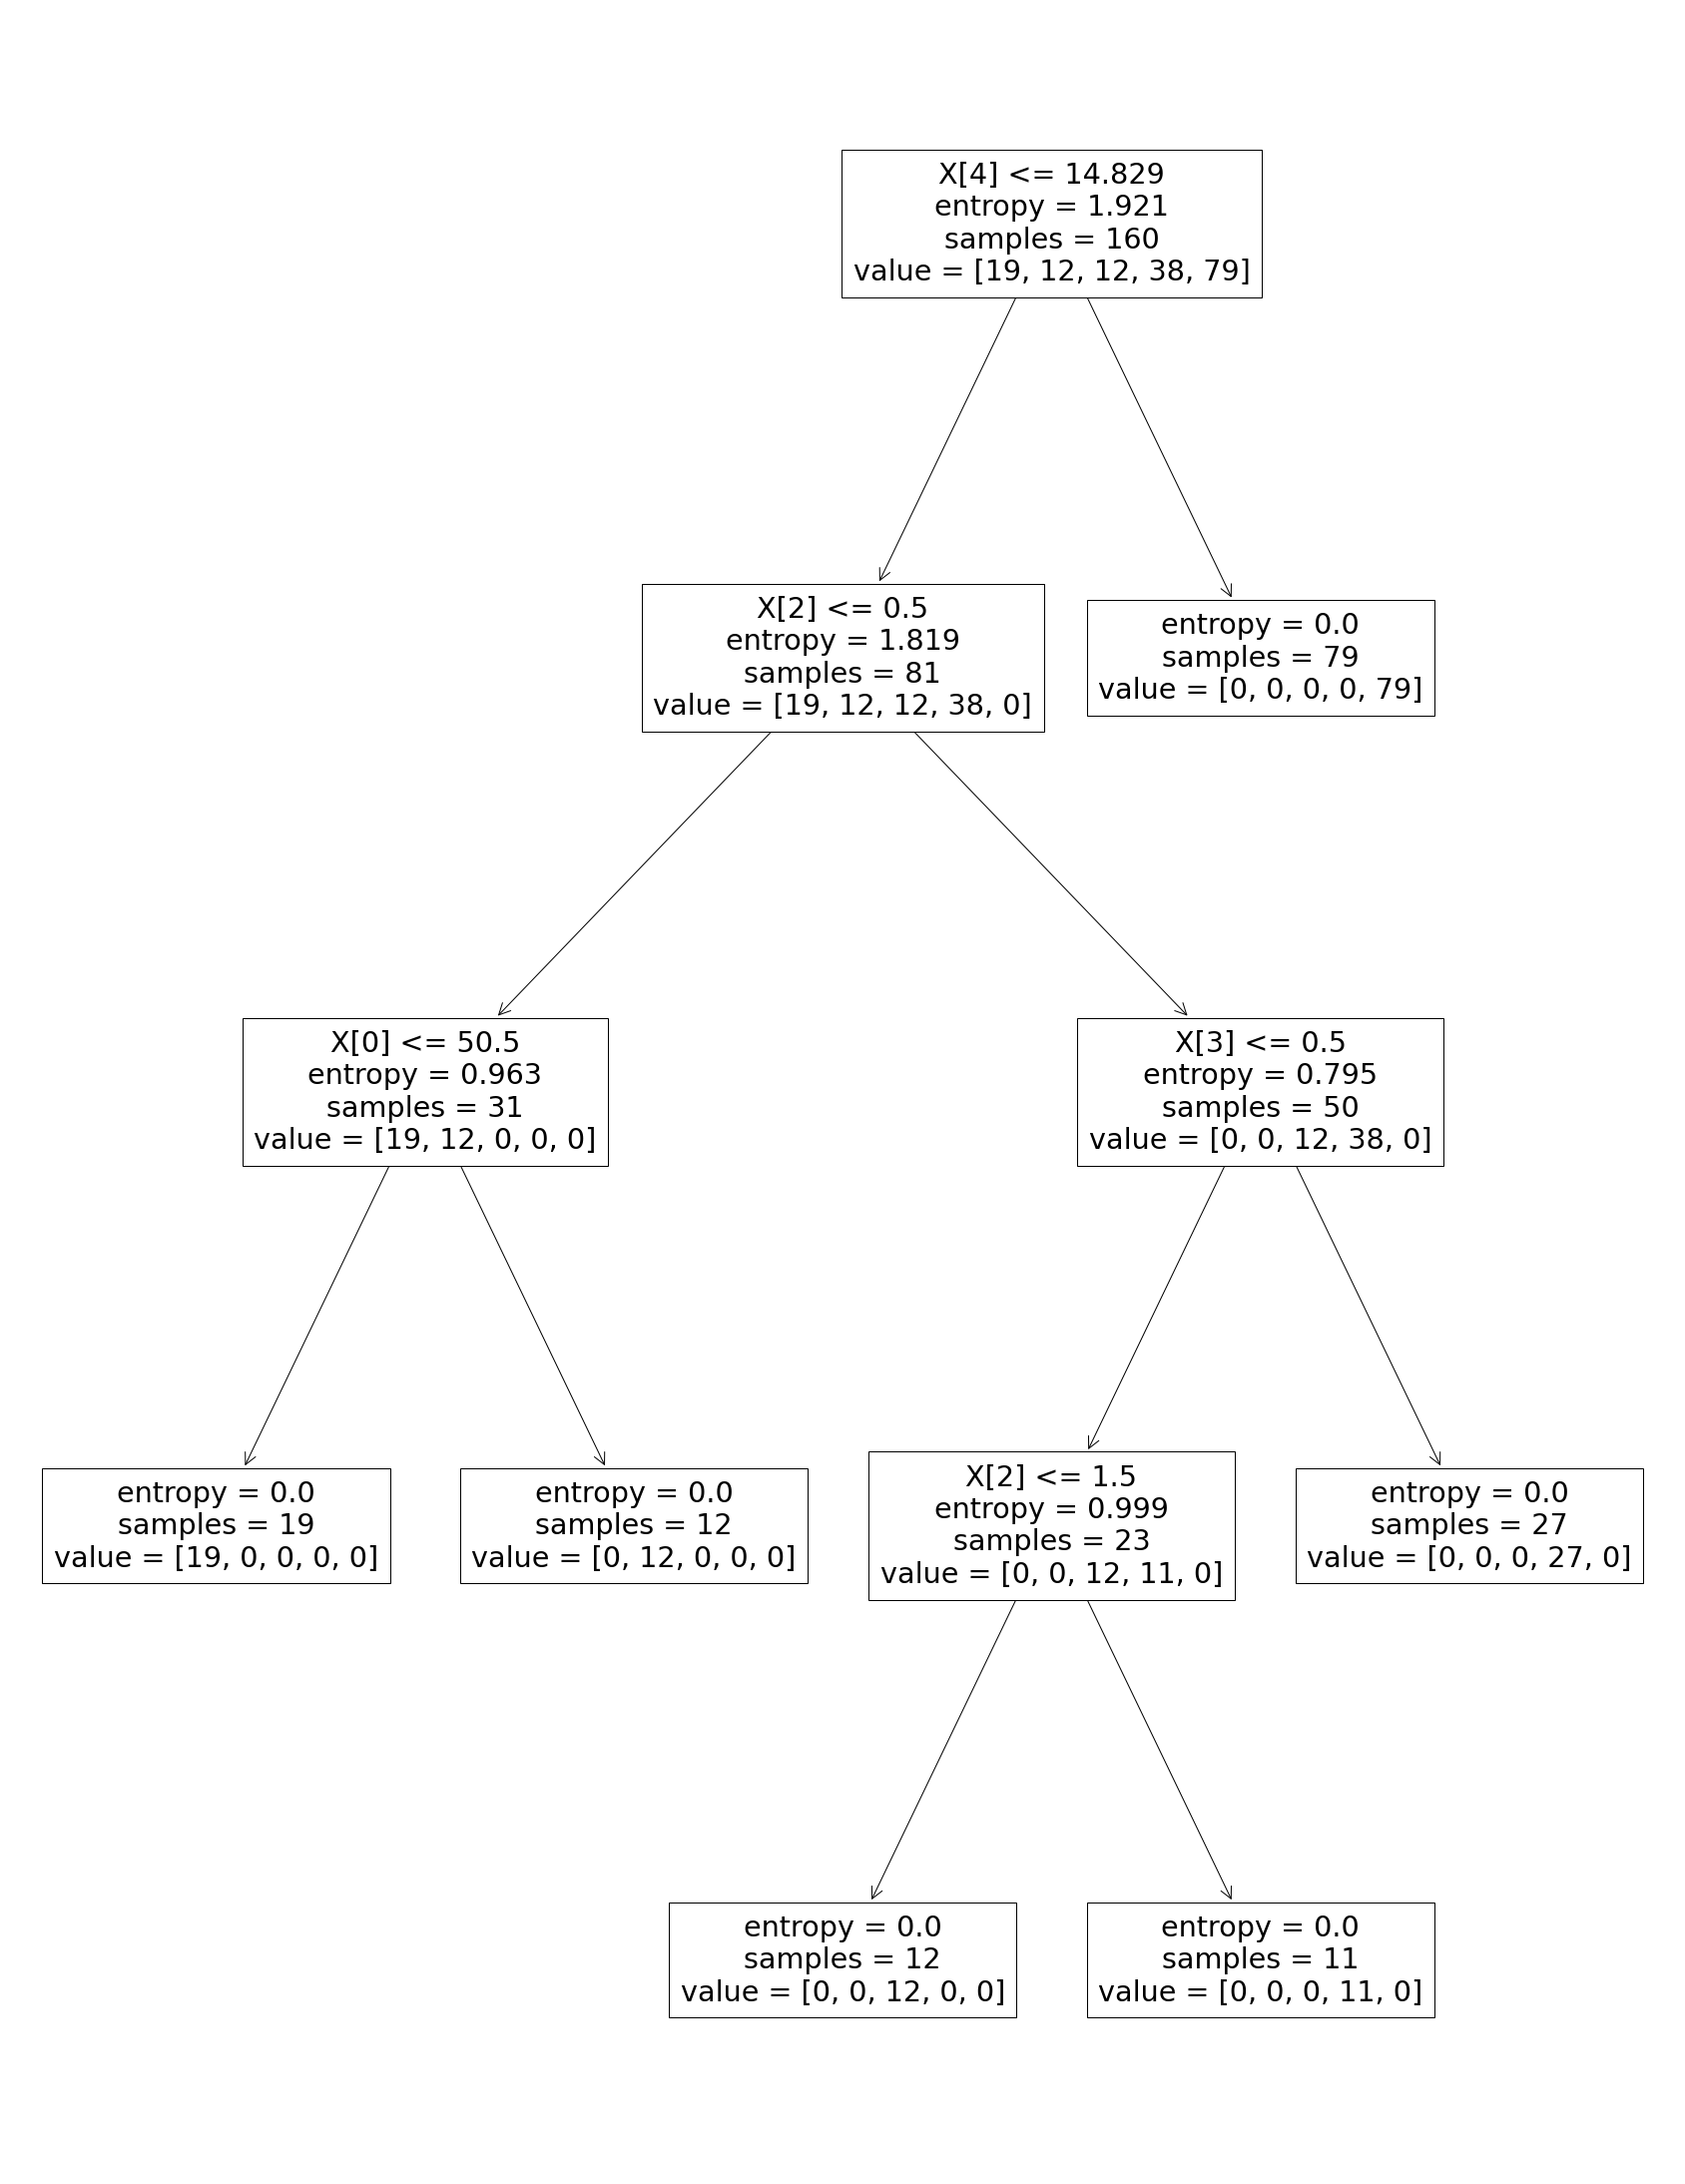

In [29]:
from sklearn import tree

model = clf.predict(X_testset)

plt.subplots(figsize=(30,40))
tree.plot_tree(clf)

SVM

In [30]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_trainset, y_trainset)
y_pred = clf.predict(X_testset)
print("\n Predicted Values:\n")
print(y_pred [0:5])
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print("classificationreport")
print(classification_report(y_testset,pred,digits=2))
print("confusion marix")
print(confusion_matrix(y_testset,pred))
from sklearn.metrics import jaccard_score
print("jaccob index")
print(jaccard_score(y_testset,pred, average='weighted'))


 Predicted Values:

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
classificationreport
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        16
       drugY       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

confusion marix
[[ 4  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 12]]
jaccob index
1.0


KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_trainset, y_trainset)
y_pred = clf.predict(X_testset)
print("\n Predicted Values:\n")
print(y_pred [0:5])
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print("classificationreport")
print(classification_report(y_testset,pred,digits=2))
print("confusion marix")
print(confusion_matrix(y_testset,pred))
from sklearn.metrics import jaccard_score
print("jaccob index")
print(jaccard_score(y_testset,pred, average='weighted'))


 Predicted Values:

['drugY' 'drugB' 'drugB' 'drugX' 'drugA']
classificationreport
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        16
       drugY       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

confusion marix
[[ 4  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 12]]
jaccob index
1.0


RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_trainset, y_trainset)
y_pred = clf.predict(X_testset)
print("\n Predicted Values:\n")
print(y_pred [0:5])
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print("classificationreport")
print(classification_report(y_testset,pred,digits=2))
print("confusion marix")
print(confusion_matrix(y_testset,pred))
from sklearn.metrics import jaccard_score
print("jaccob index")
print(jaccard_score(y_testset,pred, average='weighted'))


 Predicted Values:

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
classificationreport
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        16
       drugY       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

confusion marix
[[ 4  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 12]]
jaccob index
1.0
